In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import os
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
import zipfile
local_zip = '/content/drive/MyDrive/University/Thesis/Thesis Project Folder/SkinDiseaseDataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
main_path = "/tmp/"
train_path = os.path.join(main_path,"SkinDiseaseDataset")
train_BacalCellCercinoma = glob.glob(train_path+"/BacalCellCercinoma/*.jpg")
train_Eczema = glob.glob(train_path+"/Eczema/*.jpg")
train_Melanoma = glob.glob(train_path+"/Melanoma/*.jpg")

In [ ]:
#Train list:
train_list = [x for x in train_BacalCellCercinoma]
train_list.extend([x for x in train_Eczema])
train_list.extend([x for x in train_Melanoma])

df_train = pd.DataFrame(np.concatenate([
                       ['0']*len(train_BacalCellCercinoma),
                       ['1']*len(train_Eczema),
                       ['2']*len(train_Melanoma)]),
                  columns = ['label'])
df_train['image'] = [x for x in train_list]

In [ ]:
path = '/tmp/SkinDiseaseDataset'
#List of image:
img_list = list(df_train['image'])
data_img = []
for each in img_list:
               #Each image path:
               each_path = os.path.join(path, each)
               #Read each image:
               each_img = cv2.imread(each_path)
               #OpenCv default color is BGR. Convert it to RGB:
               each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
               #Resize the images:
               each_img_resized = cv2.resize(each_img, (112,112))
               #Save arrays to a list:
               data_img.append(each_img_resized)
# Converting list to numpy array
X = np.array(data_img)
y=df_train['label']

In [ ]:
X.shape

(9655, 112, 112, 3)

In [ ]:
X=X.reshape(9655,112*112*3)

In [ ]:
from sklearn import preprocessing
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
X = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
lsvm_model.fit(X_train,y_train)
pred_y = lsvm_model.predict(X_test)

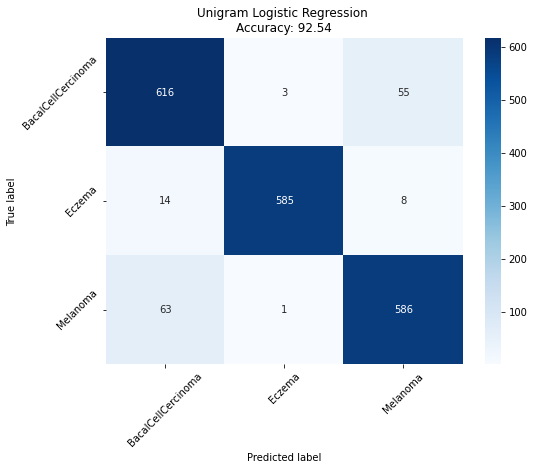

In [ ]:
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['BacalCellCercinoma' ,'Eczema' ,'Melanoma'], 
                     columns = ['BacalCellCercinoma' ,'Eczema' ,'Melanoma'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Unigram Logistic Regression \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'BacalCellCercinoma','1':'Eczema','2':'Melanoma'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
BacalCellCercinoma,88.89,91.39,90.12,674.000000
Eczema,99.32,96.38,97.83,607.000000
Melanoma,90.29,90.15,90.22,650.000000
accuracy,92.54,92.54,92.54,0.925427
macro avg,92.83,92.64,92.72,1931.000000
weighted avg,92.64,92.54,92.58,1931.000000


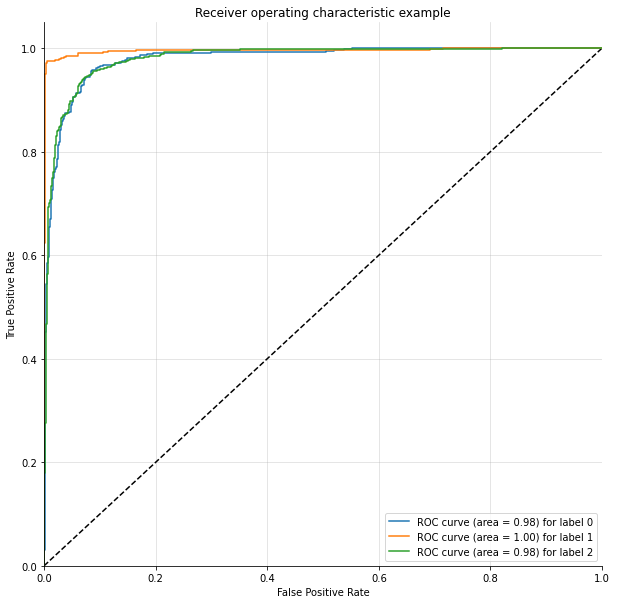

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
plot_multiclass_roc(lsvm_model,X_test, y_test, n_classes=3, figsize=(10, 10))